**Agenda**

- HadCRUT4
- netCDF
- CF Conventions
- netCDF4-python

**Install required libraries**

`conda install netCDF4 xarray numpy matplotlib`

# Introduction

We have learned numpy, a low level tool to deal with multidimensional arrays. Today we will see how higher level tools integrate with numpy to work with multidimensional data in the context of meteorology.

Also, we have worked with Numpy arrays in memory, these arrays disappear when the program ends. We will see how to persist multidimensional data using netCDF but don't forget that numpy arrays can be saved to disk using [numpy.save](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html). The binary format is described [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.lib.format.html#module-numpy.lib.format).

## HadCRUT4 Dataset

 HadCRUT4 is a global temperature dataset, providing gridded temperature anomalies across the world as well as averages for the hemispheres and the globe as a whole. CRUTEM4 and HadSST3 are the land and ocean components of this overall dataset, respectively.

These datasets have been developed by the Climatic Research Unit (University of East Anglia) in conjunction with the Hadley Centre (UK Met Office), apart from the sea surface temperature (SST) dataset which was developed solely by the Hadley Centre. These datasets will be updated at roughly monthly intervals into the future. Hemispheric and global averages as monthly and annual values are available as separate files. 

- [HadCRUT4 Dataset](https://crudata.uea.ac.uk/cru/data/temperature/)
- [CRUTEM4 Dataset](https://www.metoffice.gov.uk/hadobs/crutem4/)
- [HadSST3 Hadley Centre SST Dataset](https://www.metoffice.gov.uk/hadobs/hadsst3/)

## [netCDF](https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_introduction.html)

The Network Common Data Form, or netCDF, is an interface to a library of data access functions for storing and retrieving data in the form of arrays. An array is an n-dimensional (where n is 0, 1, 2, ...) rectangular structure containing items which all have the same data type (e.g., 8-bit character, 32-bit integer). A scalar (simple single value) is a 0-dimensional array.

NetCDF is an abstraction that supports a view of data as a collection of self-describing, portable objects that can be accessed through a simple interface. Array values may be accessed directly, without knowing details of how the data are stored. Auxiliary information about the data, such as what units are used, may be stored with the data. Generic utilities and application programs can access netCDF datasets and transform, combine, analyze, or display specified fields of the data. The development of such applications has led to improved accessibility of data and improved re-usability of software for array-oriented data management, analysis, and display.

In [1]:
!ncdump -h 'absolute.nc'

ncdump: 'absolute.nc': No such file or directory


**Answer the following questions related to `absolute.nc`**

- How many dimensions has the dataset? Which are their names?



- How many variables has the dataset? Which are their names?



- How many coordinate variables has the dataset? Which are their names?



- Which units are used for measuring temperature?



- How many temperature values (tem variable) has `absolute.nc` got?



- Why there are only 12 values in the time variable if data is monthly?




In [3]:
!ncdump -h "HadCRUT.4.6.0.0.median.nc"

netcdf HadCRUT.4.6.0.0.median {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	field_status_string_length = 1 ;
	time = UNLIMITED ; // (2037 currently)
variables:
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:point_spacing = "even" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "gregorian" ;
		time:start_year = 1850s ;
		time:end_year = 2019s ;
		time:start_month = 1s ;
		time:end_month = 9s ;
		time:axis = "T" ;
	float temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = "near_surface_temperature_anomaly" ;
		temperature_a

[Chunking](https://www.unidata.ucar.edu/blogs/developer/entry/chunking_data_why_it_matters)

### Remote netCDF

See [OpenDAP (Data Access Protocol)](https://www.unidata.ucar.edu/software/netcdf/docs/dap2.html)

In [ ]:
!ncdump -h 'https://thredds.ucar.edu/thredds/dodsC/nws/metar/ncdecoded/files/Surface_METAR_20191007_0000.nc'

## CF conventions

[CF conventions](http://cfconventions.org/) are designed to promote the processing and sharing of files created with the NetCDF API. The CF conventions are increasingly gaining acceptance and have been adopted by a number of projects and groups as a primary standard. The conventions define metadata that provide a definitive description of what the data in each variable represents, and the spatial and temporal properties of the data. This enables users of data from different sources to decide which quantities are comparable, and facilitates building applications with powerful extraction, regridding, and display capabilities.

## netCDF4-python

[netcdf4-python](http://unidata.github.io/netcdf4-python/netCDF4/index.html) is a Python interface to the netCDF C library.

netCDF version 4 has many features not found in earlier versions of the library and is implemented on top of HDF5. This module can read and write files in both the new netCDF 4 and the old netCDF 3 format, and can create files that are readable by HDF5 clients. The API modelled after Scientific.IO.NetCDF, and should be familiar to users of that module.

In [13]:
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
ds = nc4.Dataset('HadCRUT.4.6.0.0.median.nc')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: HadCRUT4 near-surface temperature ensemble data - ensemble median
    institution: Met Office Hadley Centre / Climatic Research Unit, University of East Anglia
    history: Updated at 25/10/2019 16:51:06
    source: CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment: 
    reference: Morice, C. P., J. J. Kennedy, N. A. Rayner, and P. D. Jones (2012), Quantifying uncertainties in global and regional temperature change using an ensemble of observational estimates: The HadCRUT4 dataset, J. Geophys. Res., doi:10.1029/2011JD017187
    version: HadCRUT.4.6.0.0
    Conventions: CF-1.0
    ensemble_members: 100
    ensemble_member_index: 0
    dimensions(sizes): latitude(36), longitude(72), field_status_string_length(1), time(2037)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time,latitude,longitude), |S1 field_status(ti

In [6]:
print(ds.variables)

OrderedDict([('latitude', <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    standard_name: latitude
    long_name: latitude
    point_spacing: even
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (36,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('longitude', <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    standard_name: longitude
    long_name: longitude
    point_spacing: even
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time', <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    long_name: time
    units: days since 1850-1-1 00:00:00
    calendar: gregorian
    start_year: 1850
    end_year: 2019
    start_month: 1
    end_month: 9
    axis: T
unlimited dimensions: time
current shape = (2037,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('temperatur

In [7]:
ta = ds.variables['temperature_anomaly']
print(ta)

<class 'netCDF4._netCDF4.Variable'>
float32 temperature_anomaly(time, latitude, longitude)
    long_name: near_surface_temperature_anomaly
    units: K
    missing_value: -1e+30
    _FillValue: -1e+30
    reference_period: [1961 1990]
unlimited dimensions: time
current shape = (2037, 36, 72)
filling on


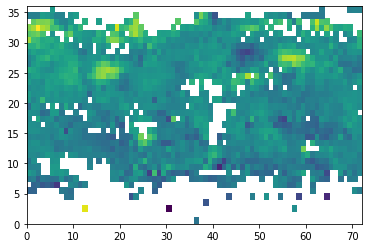

In [8]:
plt.pcolormesh(ta[-1,:,:])

In [9]:
ta_data = ta[:].data
print(f'Type: {type(ta_data)}')
print(f'Shape: {ta_data.shape}')
print(f'Ndim: {ta_data.ndim}')
print(f'Dtype: {ta_data.dtype}')
print(f'Flags:\n{ta_data.flags}')

Type: <class 'numpy.ndarray'>
Shape: (2037, 36, 72)
Ndim: 3
Dtype: float32
Flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


**Exercise**

- Print the value of the maximun anomaly
- Print the indices of the numpy array where the value is located (check with `ta_data[X,Y,Z]`)
- Convert from Kelvin to Celsius and print the maximun anomaly (`C=K-273.15`)

In [15]:
print(ta_data.max())

20.620308


In [17]:
np.unravel_index(ta_data.argmax(),(2037,36,72))

(563, 30, 12)

In [14]:
ta_data_celsius = ta_data - 273.15
print(ta_data_celsius.max())

-252.5297


## xarray

[xarray](http://xarray.pydata.org/en/stable/index.html) (formerly xray) is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.

Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.

In [1]:
import xarray as xr

In [2]:
hadcrut4 = xr.open_dataset('HadCRUT.4.6.0.0.median.nc')
print(hadcrut4)

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 2037)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2019-09-16
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 near-surface temperature ensemble data -...
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 25/10/2019 16:51:06
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  0


### DataSet

[DataSet](http://xarray.pydata.org/en/stable/data-structures.html#dataset) is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

### DataArray

[DataArray](http://xarray.pydata.org/en/stable/data-structures.html#dataarray) is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:

- values: a numpy.ndarray holding the array’s values
- dims: dimension names for each axis (e.g., ('x', 'y', 'z'))
- coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
- attrs: dict to hold arbitrary metadata (attributes)

In [3]:
print(type(hadcrut4))
print(type(hadcrut4.latitude))
print(type(hadcrut4.longitude))
print(type(hadcrut4.time))
print(type(hadcrut4.temperature_anomaly))

<class 'xarray.core.dataset.Dataset'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


In [4]:
print(hadcrut4.time) # Note how xarray interprets time values!

<xarray.DataArray 'time' (time: 2037)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2019-07-16T12:00:00.000000000',
       '2019-08-16T12:00:00.000000000', '2019-09-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ... 2019-09-16
Attributes:
    standard_name:  time
    long_name:      time
    start_year:     1850
    end_year:       2019
    start_month:    1
    end_month:      9
    axis:           T


In [5]:
print(hadcrut4.temperature_anomaly)

<xarray.DataArray 'temperature_anomaly' (time: 2037, latitude: 36, longitude: 72)>
[5279904 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2019-09-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]


In [6]:
print(hadcrut4.temperature_anomaly.values) # numpy array

[[[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        n

### matplotlib integration

In [8]:
x = hadcrut4.temperature_anomaly.sel(time=hadcrut4.time[-1])
print(x)

<xarray.DataArray 'temperature_anomaly' (latitude: 36, longitude: 72)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [     nan, 3.660432, 4.166228, ...,      nan,      nan,      nan],
       [0.174246, 0.2     , 0.198559, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ..., 0.220175, 0.401852, 0.369324]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
    time       datetime64[ns] 2019-09-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]


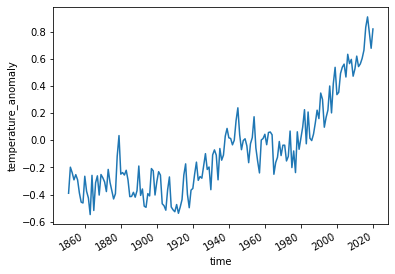

In [55]:
x.plot()

### Global temperature anomaly

In [10]:
x = hadcrut4.temperature_anomaly.resample(time='1Y').mean()
print(type(x))

<class 'xarray.core.dataarray.DataArray'>


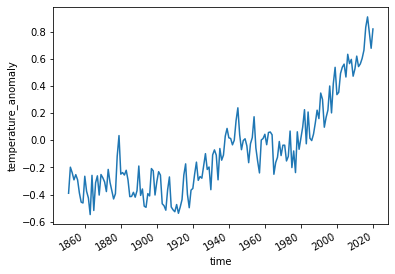

In [11]:
x.plot()

# Exercises

## 1 - Get the date for the min and max anomalies

In [54]:
max_index = np.unravel_index(hadcrut4.temperature_anomaly.argmax(),(2037,36,72))
min_index = np.unravel_index(hadcrut4.temperature_anomaly.argmin(),(2037,36,72))


print("Date for min anomaly:\n\n",hadcrut4.time[min_index[0]].data)
print("\n\nDate for max anomaly:\n\n",hadcrut4.time[max_index[0]].data)

Date for min anomaly:

 1917-12-16T12:00:00.000000000


Date for max anomaly:

 1896-12-16T12:00:00.000000000


**Solution**

(numpy.datetime64('1862-12-31T00:00:00.000000000'),
 numpy.datetime64('2016-12-31T00:00:00.000000000'))

## 2 - Plot anomalies for northen and southern poles (Hint: [where](http://xarray.pydata.org/en/stable/indexing.html#masking-with-where))

Anomly for northen pole


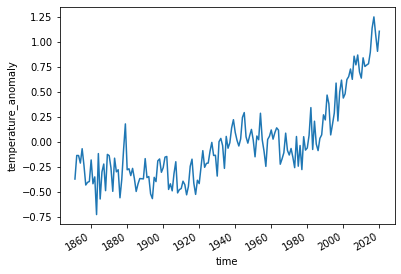

In [20]:
N = hadcrut4.temperature_anomaly.where(hadcrut4.latitude > 0).resample(time="1Y").mean()
print("Anomly for northen pole")
N.plot()

Anomly for southern pole


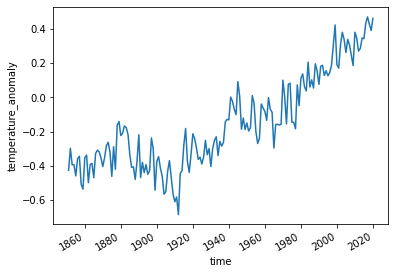

In [19]:
S = hadcrut4.temperature_anomaly.where(hadcrut4.latitude < 0).resample(time="1Y").mean()
print("Anomly for southern pole")
S.plot()

## 3 - Get temperature values used to calculate anomalies in 2018 (as a numpy array (.values))

**Look at temperature units**

In [21]:
absolute = xr.open_dataset('absolute.nc')
print(absolute)

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 12)
Coordinates:
  * lat      (lat) float32 87.5 82.5 77.5 72.5 67.5 ... -72.5 -77.5 -82.5 -87.5
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * time     (time) int16 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tem      (time, lat, lon) float32 ...


In [22]:
print(absolute.tem)

<xarray.DataArray 'tem' (time: 12, lat: 36, lon: 72)>
array([[[-30.099998, -30.099998, ..., -30.699999, -30.5     ],
        [-29.3     , -29.199999, ..., -29.5     , -29.3     ],
        ...,
        [ -4.7     ,  -4.4     , ...,  -6.4     ,  -5.6     ],
        [-26.599998, -27.4     , ..., -27.4     , -27.5     ]],

       [[-30.5     , -30.599998, ..., -31.      , -30.8     ],
        [-29.4     , -29.4     , ..., -29.599998, -29.5     ],
        ...,
        [-11.099999, -10.599999, ..., -13.4     , -12.3     ],
        [-38.3     , -39.2     , ..., -39.399998, -39.399998]],

       ...,

       [[-24.4     , -24.5     , ..., -24.6     , -24.699999],
        [-22.3     , -22.199999, ..., -22.5     , -22.5     ],
        ...,
        [-12.      , -11.7     , ..., -14.099999, -13.099999],
        [-36.899998, -37.7     , ..., -37.899998, -37.899998]],

       [[-29.3     , -29.5     , ..., -29.3     , -29.4     ],
        [-27.      , -27.099998, ..., -27.099998, -27.099998],
      

In [52]:
# a2018 = t2018 - absolute
a2018 = hadcrut4.temperature_anomaly.sel(time=slice('2018-01-01', '2018-12-31'))
t2018 = a2018.data + absolute.tem.data + 273.15

In [51]:
print(t2018[~np.isnan(t2018)].sum(), t2018[~np.isnan(t2018)].max()) # 6214262.5, 310.1098

6214262.5 310.1098
